In [161]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [175]:
#  Density, Radius, root radius, number of blades, chord, mass, payload and gravity respectively
rho=0.02
R=0.5
Rrc=0.0525
b=3
c=0.0508
m=3.5
m_p=1
g=3.72
area=math.pi*(R**2 - Rrc**2)

# RPM, angular velocity and vertical velocity
rpm=2000
omega = 2*math.pi*rpm/60

# Lift coefficient terms:
a=8

# Coefficient of drag (fuselage, rotor) and wetted area
Cd_f = 0.4
Cd_0=0.4
S=0.9

# Solidity
sol=b*c/(math.pi*R)

# Climb and forward velocity
V=1
V_inf=5.5

In [176]:
# Tail rotor Radius, root radius, chord and solidity
R_tail=0.15
Rrc_tail=0.0225
c_tail=0.008
area_tail=math.pi*(R_tail**2 - Rrc_tail**2)

# Thrust and solidity
T_tail=0.564 # Torque = 0.282, Moment arm = 0.5
sol_tail=3*c_tail/(math.pi*R_tail)

In [177]:
# power output, energy capacity
p=1000
en=720 #watt-hr

# power factor, power loss
k=1.1
p_loss=0.04

In [178]:
# function to calculate power
def power(rho, V, V_inf):
    
    # drag and angle of attack
    D = 0.5*rho*Cd_0*V_inf**2 * S
    alpha_tpp=math.atan(D/W)
    
    mu=V_inf*math.cos(alpha_tpp)/(omega*R)
    
    # thrust and thrust coefficient
    T=W/math.cos(alpha_tpp)
    C_T=T/(rho*math.pi*R**2 * (omega*R)**2)
    
    # induced inflow
    lamb=C_T/(2*mu)
    
    # induced velocity
    v=omega*R*lamb
    #v=-V/2 + math.sqrt((V/2)**2 + T/(2*rho*area))
    # induced
    p_i = k*T*v
    
    # profile
    p_o = sol*Cd_0*rho*(omega*R)**3 *math.pi*R**2 * 0.125
    
    # climb
    p_c = W*V
    #p_c=0
    
    # fuselage
    p_f = 0.5*rho*Cd_f*V_inf**2 * S*V_inf
    #p_f=0
    
    # total
    p_t=(1-p_loss)*(p_i+p_o+p_c+p_f)
    
    return p_t

In [179]:
# Power (tail)

def power_tail(rho,V_inf):
    
    #induced velocity and power
    v_tail = math.sqrt(T_tail/(2*rho*area_tail))
    p_i_tail = k*T_tail*v_tail
    
    #profile
    p_o_tail = sol_tail*Cd_0*rho*(omega*R_tail)**3 *math.pi*R_tail**2 * 0.125
    
    #total
    p_t_tail = (1-p_loss)*(p_i_tail + p_o_tail)
    
    return p_t_tail

[Text(0, 0.5, 'Power (W)'), Text(0.5, 0, 'Velocity (m/s)')]

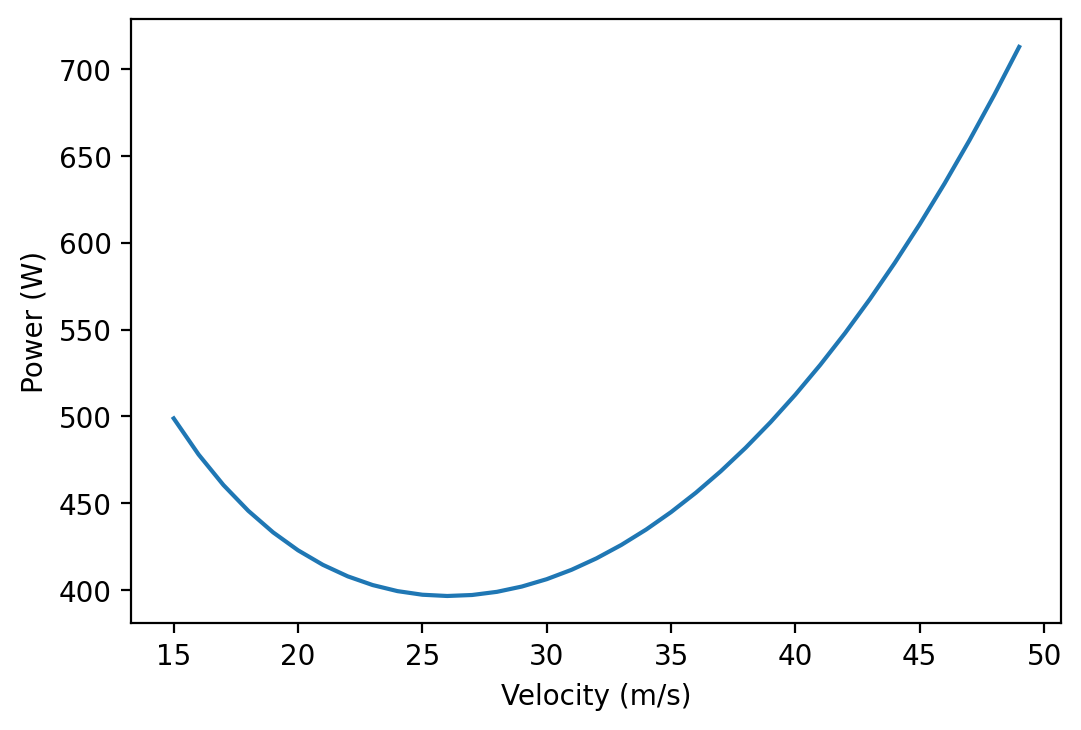

In [180]:
# empty arrays for power and velocity
power_array=[]
vel_array=[]

# weight (with or without payload)
W=m*g
#W=(m-m_p)*g

# iteration for velocity
for i in range(15,50):
    power_array.append(power(rho,V,i) + power_tail(rho,i))
    vel_array.append(i)

# plotting
fig,ax = plt.subplots(dpi=200)
ax.plot(vel_array,power_array)
ax.set(xlabel='Velocity (m/s)',ylabel='Power (W)')

In [181]:
# function to calculate L/D
def l_by_d(rho,V,V_inf):
    L=W # lift = weight
    pow=power(rho,V,V_inf)
    
    # drag = power/velocity - fuselage drag
    D = pow/V_inf - 0.5*rho*Cd_f*V_inf**2 * S
    return L/D

[Text(0, 0.5, 'L/D'), Text(0.5, 0, 'Velocity (m/s)')]

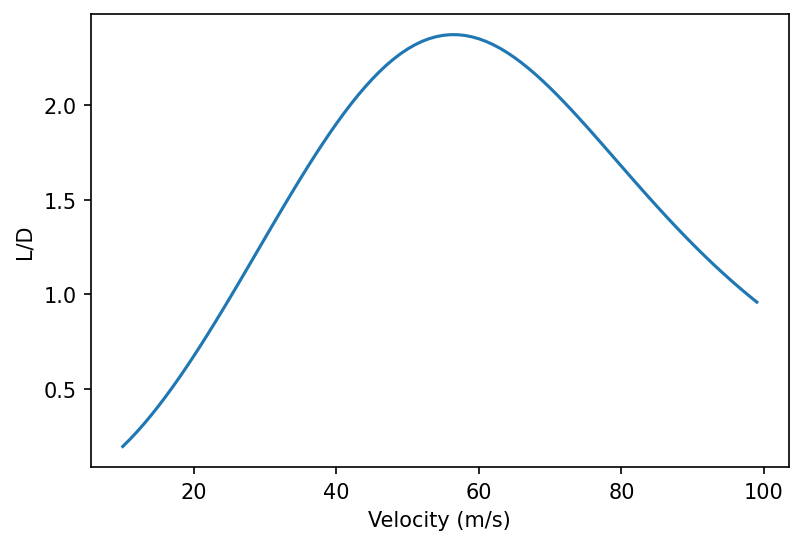

In [182]:
# empty arrays
l_by_d_array=[]
vel_array=[]

# iteration for velocity
for i in range(10,100):
    l_by_d_array.append(l_by_d(rho,V,i))
    vel_array.append(i)
    
# plotting
fig,ax = plt.subplots(dpi=150)
ax.plot(vel_array,l_by_d_array)
ax.set(xlabel='Velocity (m/s)',ylabel='L/D')

In [183]:
# function for density variation (with altitude)
def density(h):
    if h < 7000:
        temp=-31-0.000998*h
        pres=0.699*math.e**(-0.00009*h)
    if h >= 7000:
        temp = -23.4-0.00222*h
        pres=0.699*math.e**(-0.00009*h)
    #t1=1-0.00198*h/288.16
    #dens=0.02*(t1**4.2553)
    dens=pres/(0.1921*(temp+273))
    return dens

[Text(0, 0.5, 'Power (W)'), Text(0.5, 0, 'Altitude (m)')]

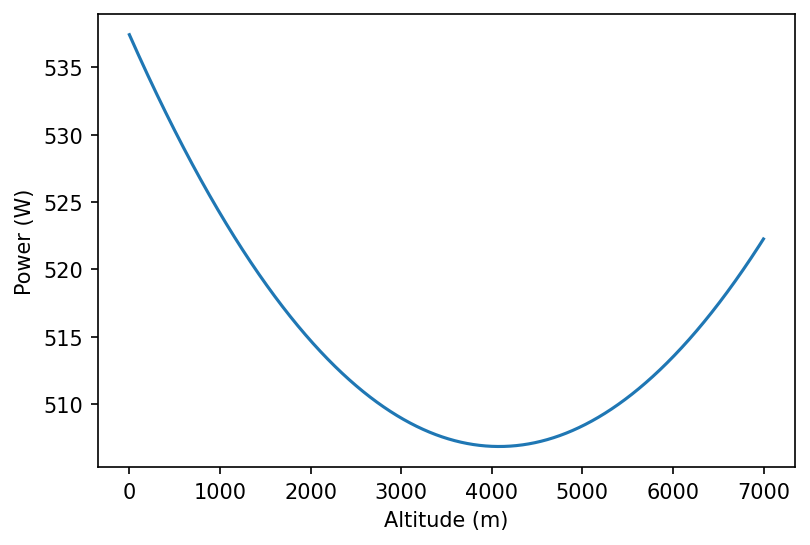

In [188]:
# empty arrays
power_array=[]
alt_array=[]

# forward velocity taken close to 65 m/s (velocity for max range)
V_inf=45

# weight (with or without payload)
W=m*g
#W=(m-m_p)*g

# iteration for varying altitude
for i in range(0,7000):
    rho_i=density(i)
    power_array.append(power(rho_i,V,V_inf) + power_tail(rho_i,V_inf))
    alt_array.append(i)

# plotting
fig,ax = plt.subplots(dpi=150)
ax.plot(alt_array,power_array)
ax.set(xlabel='Altitude (m)',ylabel='Power (W)')